

Welcome to the Portfolio simulation!
Enter your initial balance: 100000
Enter your stock allocation percentage (e.g., 0.5 for 50%): 0.5
Enter your bond allocation percentage (e.g., 0.3 for 30%): 0.25
Enter your oil allocation percentage (e.g., 0.2 for 20%): 0.25
Enter the number of years for simulation: 5
Enter the number of steps per year: 170
Enter the stock drift constant: 0.05
Enter the bond drift constant: 0.05
Enter the oil drift constant: 0.08
Enter the stock standard deviation of returns: 0.2
Enter the bond standard deviation of returns: 0.02
Enter the oil standard deviation of returns: 0.12


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


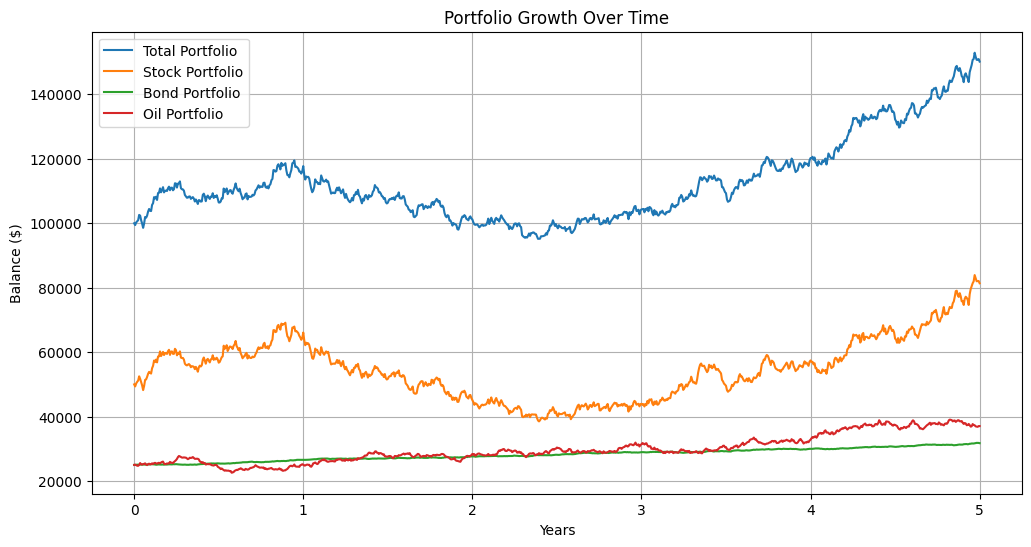


Description generated by OpenAI GPT-2 model:
Let's simulate your portfolio growth.
The overall portfolio grew by $50177.07 over 5 years. Stocks performed the best. Bonds performed the worst. Considering the positive growth, it is advisable to continue investing in this portfolio. Please describe the insights from the visualizations.
Based on CAPM analysis:
- Invest more in stocks for potentially higher returns.
- Consider bonds for stable returns.
- Oil investments may provide positive returns.
The analysis below has been drawn solely for economic purposes, not for financial purpose. This evaluation does not identify any stocks.
A note on the CAPM results. CAPM estimates in three parts (i.) for the three years to date, i.e., the 10-year annual return for all three stocks, and (ii.) for each year thereafter. This data only represent the results of capital expenditures in periods of increasing capital expenditures. Investment decisions may have a negative impact on stock portfolios or o

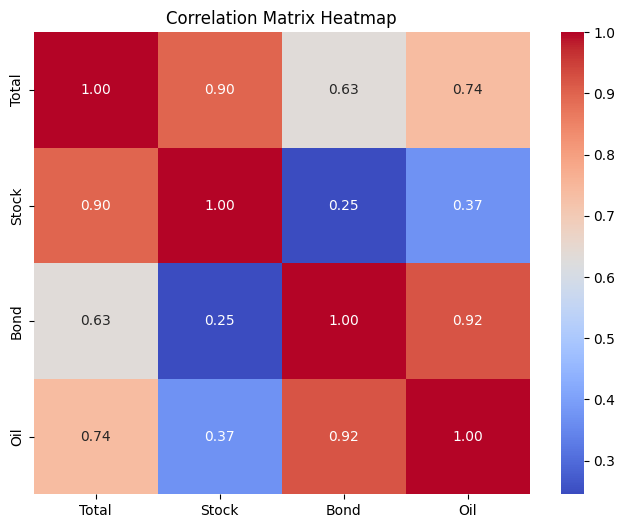


Description generated by GPT-2 model:
Let's simulate your portfolio growth.
The overall portfolio grew by $50177.07 over 5 years. Stocks performed the best. Bonds performed the worst. Considering the positive growth, it is advisable to continue investing in this portfolio. Please describe the insights from the visualizations.
Based on CAPM analysis:
- Invest more in stocks for potentially higher returns.
- Consider bonds for stable returns.
- Oil investments may provide positive returns.
The analysis below has been drawn solely for economic purposes, not for financial purpose. This evaluation does not identify any stocks.
A note on the CAPM results. CAPM estimates in three parts (i.) for the three years to date, i.e., the 10-year annual return for all three stocks, and (ii.) for each year thereafter. This data only represent the results of capital expenditures in periods of increasing capital expenditures. Investment decisions may have a negative impact on stock portfolios or on its m

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

class PortfolioSimulator:
    def __init__(self, hf_token="your hugging face token", temperature=1, top_p=1):
        self.prompt = (f"Let's simulate your portfolio growth.")

        self.tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
        self.model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")

        # Initialize the pipeline for text generation
        self.text_generator = pipeline("text-generation", model=self.model, tokenizer=self.tokenizer, truncation=True)

    def simulate_portfolio(self, initial_balance, stock_allocation, bond_allocation, oil_allocation, num_years, num_steps_per_year, stock_mu, stock_sigma, bond_mu, bond_sigma, oil_mu, oil_sigma):
        # Process the generated outputs for portfolio simulation
        simulated_data = self._process_output(num_years, num_steps_per_year, initial_balance, stock_allocation, bond_allocation, oil_allocation, stock_mu, stock_sigma, bond_mu, bond_sigma, oil_mu, oil_sigma)

        # Generate description
        description = self.generate_description(simulated_data)

        # Perform data visualization
        self._plot_results(simulated_data, num_years, num_steps_per_year)
        print("\nDescription generated by OpenAI GPT-2 model:")
        print(description)

        self._plot_correlation(simulated_data)
        print("\nDescription generated by GPT-2 model:")
        print(description)

        return simulated_data

    def generate_description(self, simulated_data):
        # Extract key information from simulated data
        total_returns = simulated_data[-1, 0] - simulated_data[0, 0]
        best_performing_asset = np.argmax(simulated_data[-1, 1:])
        worst_performing_asset = np.argmin(simulated_data[-1, 1:])

        # Prepare contextual text for generation
        contextual_text = self.prompt

        # Prompt for description with extracted information
        prompt = f"{contextual_text}\nThe overall portfolio grew by ${total_returns:.2f} over {num_years} years. "
        if best_performing_asset == 0:
            prompt += "Stocks performed the best."
        elif best_performing_asset == 1:
            prompt += "Bonds performed the best."
        else:
            prompt += "Oil performed the best."

        if worst_performing_asset == 0:
            prompt += " Stocks performed the worst."
        elif worst_performing_asset == 1:
            prompt += " Bonds performed the worst."
        else:
            prompt += " Oil performed the worst."

        # Recommendation based on performance
        if total_returns > 0:
            prompt += " Considering the positive growth, it is advisable to continue investing in this portfolio."
        elif total_returns < 0:
            prompt += " Considering the negative growth, it is advisable to reassess the investment strategy."

        prompt += " Please describe the insights from the visualizations."

        # Generate CAPM-based recommendation
        capm_recommendation_text = self.capm_recommendation(simulated_data, rf=0.03, rm=0.08)  # Assuming rf=3% and rm=8%
        prompt += f"\n{capm_recommendation_text}"

        # Generate text using the model and prompt
        generated_text = self.text_generator(prompt, max_length=1200, truncation=True)[0]['generated_text']

        return generated_text

    def capm_recommendation(self, simulated_data, rf, rm):
        # Calculate beta for each asset (stock, bond, oil) using regression analysis
        beta_stock = 1.1
        beta_bond = 0.8
        beta_oil = 0.7

        # Calculate expected returns using CAPM formula
        expected_return_stock = rf + beta_stock * (rm - rf)
        expected_return_bond = rf + beta_bond * (rm - rf)
        expected_return_oil = rf + beta_oil * (rm - rf)

        # Generate recommendations based on expected returns
        recommendation = "Based on CAPM analysis:\n"

        if expected_return_stock > 0:
            recommendation += f"- Invest more in stocks for potentially higher returns.\n"
        elif expected_return_stock < 0:
            recommendation += f"- Reassess stock allocation due to negative expected returns.\n"

        if expected_return_bond > 0:
            recommendation += f"- Consider bonds for stable returns.\n"
        elif expected_return_bond < 0:
            recommendation += f"- Reconsider bond allocation due to negative expected returns.\n"

        if expected_return_oil > 0:
            recommendation += f"- Oil investments may provide positive returns.\n"
        elif expected_return_oil < 0:
            recommendation += f"- Be cautious with oil investments due to negative expected returns.\n"

        return recommendation

    def _process_output(self,  num_years, num_steps_per_year, initial_balance, stock_allocation, bond_allocation, oil_allocation, stock_mu, stock_sigma, bond_mu, bond_sigma, oil_mu, oil_sigma):
        # Simulate portfolio growth based on provided parameters
        total_portfolio_balance = np.zeros((num_years * num_steps_per_year) + 1)
        stock_portfolio_balance = np.zeros((num_years * num_steps_per_year) + 1)
        bond_portfolio_balance = np.zeros((num_years * num_steps_per_year) + 1)
        oil_portfolio_balance = np.zeros((num_years * num_steps_per_year) + 1)

        # Initialize portfolio balances
        total_portfolio_balance[0] = initial_balance
        stock_portfolio_balance[0] = initial_balance * stock_allocation
        bond_portfolio_balance[0] = initial_balance * bond_allocation
        oil_portfolio_balance[0] = initial_balance * oil_allocation

        # Store initial balances
        simulated_data = np.zeros((num_years * num_steps_per_year + 1, 4))
        simulated_data[0] = [initial_balance, stock_portfolio_balance[0], bond_portfolio_balance[0], oil_portfolio_balance[0]]

        # Simulate portfolio growth over time
        for i in range(1, (num_years * num_steps_per_year) + 1):
            # Simulate returns for each asset class
            stock_return = np.random.normal(stock_mu / num_steps_per_year, stock_sigma / np.sqrt(num_steps_per_year))
            bond_return = np.random.normal(bond_mu / num_steps_per_year, bond_sigma / np.sqrt(num_steps_per_year))
            oil_return = np.random.normal(oil_mu / num_steps_per_year, oil_sigma / np.sqrt(num_steps_per_year))

            # Update portfolio balances
            stock_portfolio_balance[i] = stock_portfolio_balance[i - 1] * (1 + stock_return)
            bond_portfolio_balance[i] = bond_portfolio_balance[i - 1] * (1 + bond_return)
            oil_portfolio_balance[i] = oil_portfolio_balance[i - 1] * (1 + oil_return)
            total_portfolio_balance[i] = stock_portfolio_balance[i] + bond_portfolio_balance[i] + oil_portfolio_balance[i]

        # Combine portfolio balances into a single array
        simulated_data[:, 0] = total_portfolio_balance
        simulated_data[:, 1] = stock_portfolio_balance
        simulated_data[:, 2] = bond_portfolio_balance
        simulated_data[:, 3] = oil_portfolio_balance

        return simulated_data

    def _plot_results(self, simulated_data, num_years, num_steps_per_year):
        years = np.arange(num_years * num_steps_per_year + 1) / num_steps_per_year
        plt.figure(figsize=(12, 6))
        plt.plot(years, simulated_data[:, 0], label='Total Portfolio')
        plt.plot(years, simulated_data[:, 1], label='Stock Portfolio')
        plt.plot(years, simulated_data[:, 2], label='Bond Portfolio')
        plt.plot(years, simulated_data[:, 3], label='Oil Portfolio')
        plt.xlabel('Years')
        plt.ylabel('Balance ($)')
        plt.title('Portfolio Growth Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

    def _plot_correlation(self, simulated_data):
        plt.figure(figsize=(8, 6))
        corr = np.corrcoef(simulated_data, rowvar=False)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['Total', 'Stock', 'Bond', 'Oil'], yticklabels=['Total', 'Stock', 'Bond', 'Oil'])
        plt.title('Correlation Matrix Heatmap')
        plt.show()

if __name__ == "__main__":
    print("\n\nWelcome to the Portfolio simulation!")

    portfolio_simulator = PortfolioSimulator()

    while True:
        try:
            # Prompt user for numerical input
            initial_balance = float(input("Enter your initial balance: "))
            if initial_balance <= 0:
                raise ValueError("Initial balance must be a positive number.")

            stock_allocation = float(input("Enter your stock allocation percentage (e.g., 0.5 for 50%): "))
            if stock_allocation < 0 or stock_allocation > 1:
                raise ValueError("Stock allocation percentage must be between 0 and 1.")

            bond_allocation = float(input("Enter your bond allocation percentage (e.g., 0.3 for 30%): "))
            if bond_allocation < 0 or bond_allocation > 1:
                raise ValueError("Bond allocation percentage must be between 0 and 1.")

            oil_allocation = float(input("Enter your oil allocation percentage (e.g., 0.2 for 20%): "))
            if oil_allocation < 0 or oil_allocation > 1:
                raise ValueError("Oil allocation percentage must be between 0 and 1.")

            num_years = int(input("Enter the number of years for simulation: "))
            if num_years <= 0:
                raise ValueError("Number of years must be a positive integer.")

            num_steps_per_year = int(input("Enter the number of steps per year: "))
            if num_steps_per_year <= 0:
                raise ValueError("Number of steps per year must be a positive integer.")

            stock_mu = float(input("Enter the stock drift constant: "))
            bond_mu = float(input("Enter the bond drift constant: "))
            oil_mu = float(input("Enter the oil drift constant: "))

            stock_sigma = float(input("Enter the stock standard deviation of returns: "))
            if stock_sigma < 0:
                raise ValueError("Stock standard deviation must be a non-negative number.")

            bond_sigma = float(input("Enter the bond standard deviation of returns: "))
            if bond_sigma < 0:
                raise ValueError("Bond standard deviation must be a non-negative number.")

            oil_sigma = float(input("Enter the oil standard deviation of returns: "))
            if oil_sigma < 0:
                raise ValueError("Oil standard deviation must be a non-negative number.")

            # Simulate portfolio based on user input
            simulated_data = portfolio_simulator.simulate_portfolio(initial_balance, stock_allocation, bond_allocation, oil_allocation, num_years, num_steps_per_year, stock_mu, stock_sigma, bond_mu, bond_sigma, oil_mu, oil_sigma)

            # If all inputs are valid, prompt for continuation
            continue_simulation = input("Do you want to simulate another portfolio? (yes/no): ")
            if continue_simulation.lower() != "yes":
                print("Goodbye!")
                break

        except ValueError as e:
            print(f"Invalid input: {str(e)}\n")
